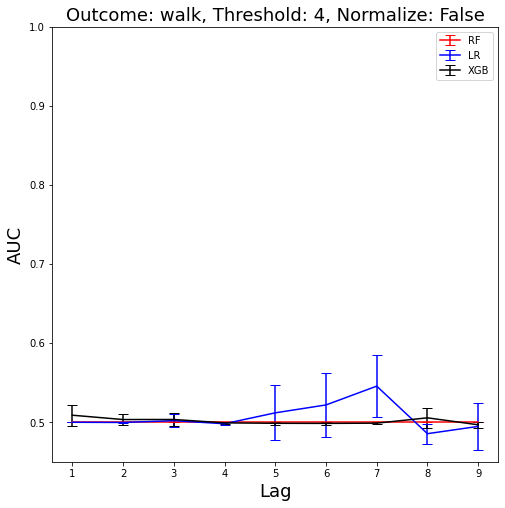

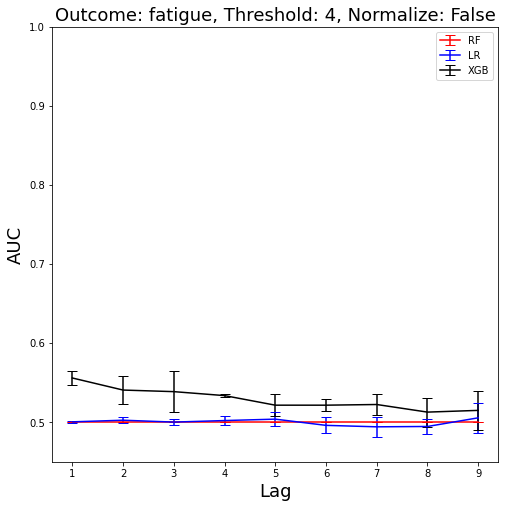

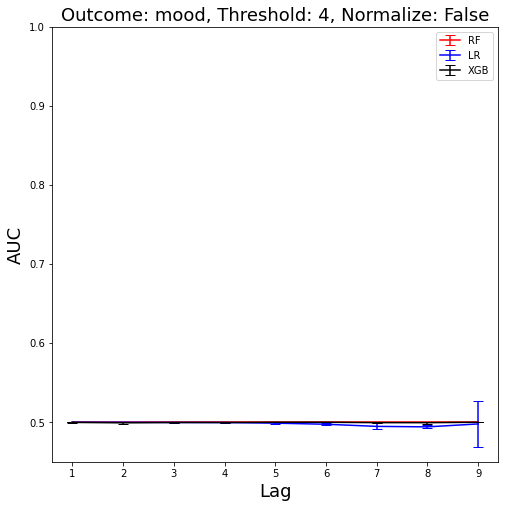

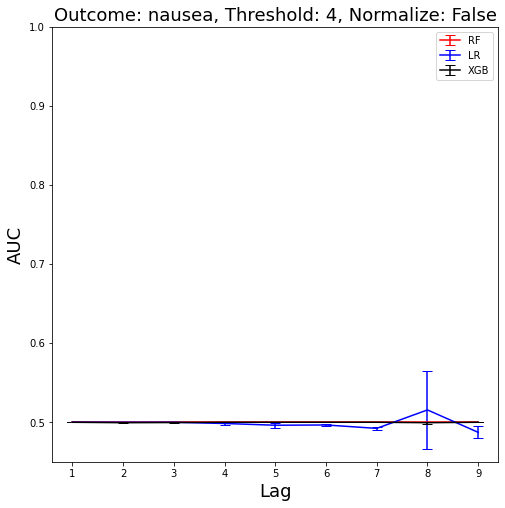

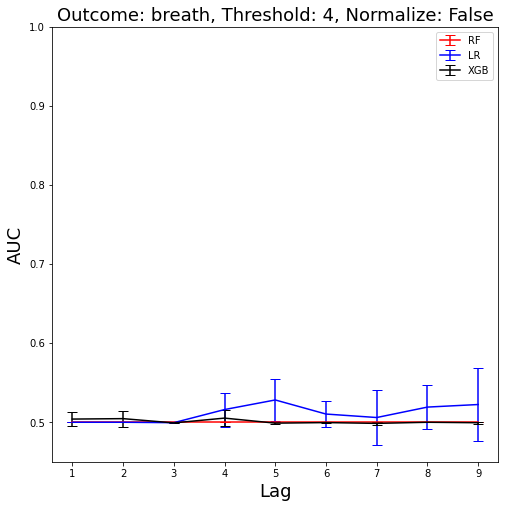

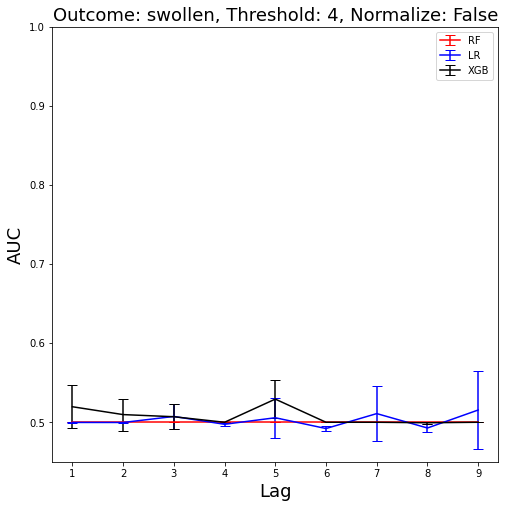

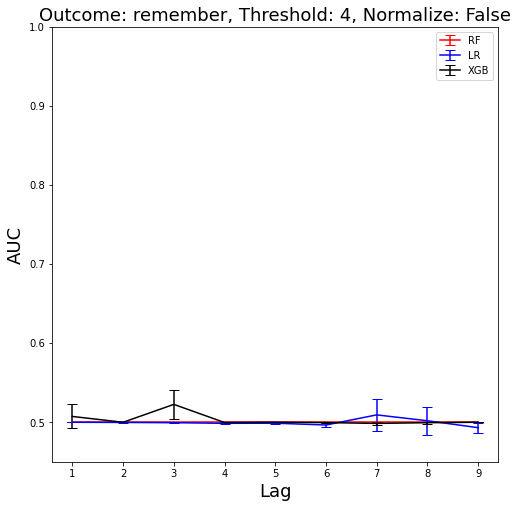

In [15]:
import numpy as np
import pandas as pd
import boto3
import json
import os
import ast
import csv
import io
from io import StringIO, BytesIO, TextIOWrapper
import gzip
from datetime import datetime, date
from s3_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ast
from datetime import timedelta
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
# import tslearn
try:
    import torch
except: pass

# THIS CODE BLOCK WON'T WORK YET. stacking results_cv will result in the wrong shape right now.
thresholds = [4]
min_window = 1
max_window = 10
normalized_x = False
normalized_y = False
x = np.arange(1, max_window-min_window+1)
y = np.load(f'/mnt/results/results_array/thresholds-{thresholds[0]}-min_window-{min_window}-max_window-{max_window}-normalize-{normalized}.npy')

colors = ["r", "b", "k"]
outcome_names = [
    "walk",
    "fatigue",
    "mood",
    "nausea",
    "breath",
    "swollen",
    "remember",
]
for i in range(y.shape[2]):
    fig, ax = plt.subplots(figsize=(8, 8))
#     for j in range(y.shape[1]):
    ax.errorbar(x=x, y=y[:, :, i, 0].mean(0), yerr=y[:, :, i, 0].std(0), capsize=5, c=colors[0], label="RF")
    ax.errorbar(x=x, y=y[:, :, i, 1].mean(0), yerr=y[:, :, i, 1].std(0), capsize=5, c=colors[1], label="LR")
    ax.errorbar(x=x, y=y[:, :, i, 2].mean(0), yerr=y[:, :, i, 2].std(0), capsize=5, c=colors[2], label="XGB")

    ax.set_title(f'Outcome: {outcome_names[i]}, Threshold: {thresholds[0]}, Normalize: {normalized}', fontsize=18)
    ax.set_xticks(x)
    ax.set_ylabel("AUC", fontsize=18)
    ax.set_xlabel("Lag", fontsize=18)
    ax.set_ylim([0.45, 1.0])
    ax.legend()
    plt.savefig(f'/mnt/results/results_figure/thresholds-{thresholds[0]}-min_window-{min_window}-max_window-{max_window}-normalize_x-{normalized_x}-normalize_y-{normalized_y}/{outcome_names[i]}.jpeg')